In [2]:
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

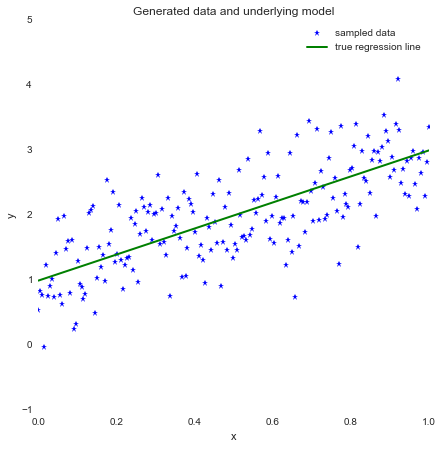

In [19]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, '*b', label='sampled data')
ax.plot(x, true_regression_line, 'g', label='true regression line', lw=2.)
plt.legend(loc=0)

In [22]:
with Model() as model:
    glm.glm('y ~ x', data)
    start = find_MAP()
    step = NUTS(scaling=start)
    trace = sample(10000, step)

 [-----------------100%-----------------] 10000 of 10000 complete in 16.1 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118b404d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119350650>]], dtype=object)

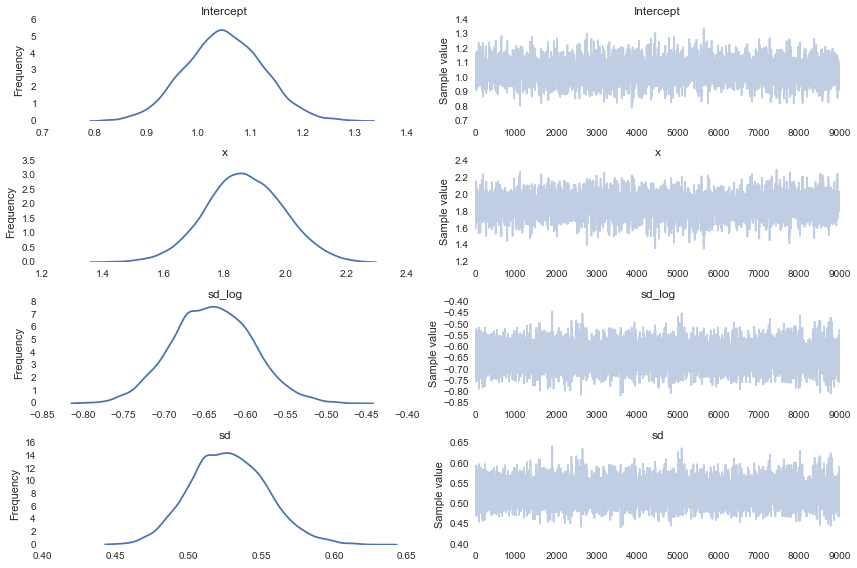

In [25]:
traceplot(trace[1000:])

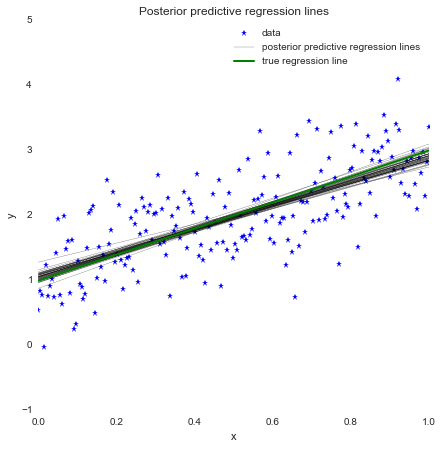

In [35]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, '*b', label='data')
glm.plot_posterior_predictive(trace, samples=50, 
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=2., c='g')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y')